In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the csv file into a pandas DataFrame
baseball = pd.read_csv('../Resources/baseball.csv')

In [3]:
base_1 = baseball[['RS', 'RA', 'W', 'OBP', 'SLG', 'BA', 'Playoffs']]
base_1.head()

,RS,RA,W,OBP,SLG,BA,Playoffs
0,734,688,81,0.328,0.418,0.259,0
1,700,600,94,0.320,0.389,0.247,1
2,712,705,93,0.311,0.417,0.247,1
3,734,806,69,0.315,0.415,0.260,0
4,613,759,61,0.302,0.378,0.240,0


In [4]:
# Assign X (data) and y (target)
X = base_1[['RS', 'RA', 'W', 'OBP', 'SLG', 'BA']]
y = base_1["Playoffs"].values.reshape(-1, 1)
print(X.shape, y.shape)

(1232, 6) (1232, 1)


In [5]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
# Create a StandardScater model and fit it to the training data
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [7]:
# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [8]:
# Create a LinearRegression model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

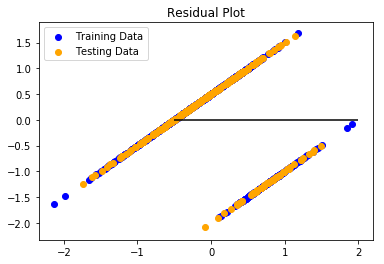

In [9]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [11]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print("MSE: " + str(MSE))
print("r2: " + str(r2))

MSE: 0.6232216728428117
r2: 0.35558617897045797
